# Adagrad

Epoch 0, Loss: 0.6855
Epoch 100, Loss: 0.5860
Epoch 200, Loss: 0.5556
Epoch 300, Loss: 0.5368
Epoch 400, Loss: 0.5234
Epoch 500, Loss: 0.5132
Epoch 600, Loss: 0.5050
Epoch 700, Loss: 0.4983
Epoch 800, Loss: 0.4926
Epoch 900, Loss: 0.4878

Accuracy on test set: 0.7528


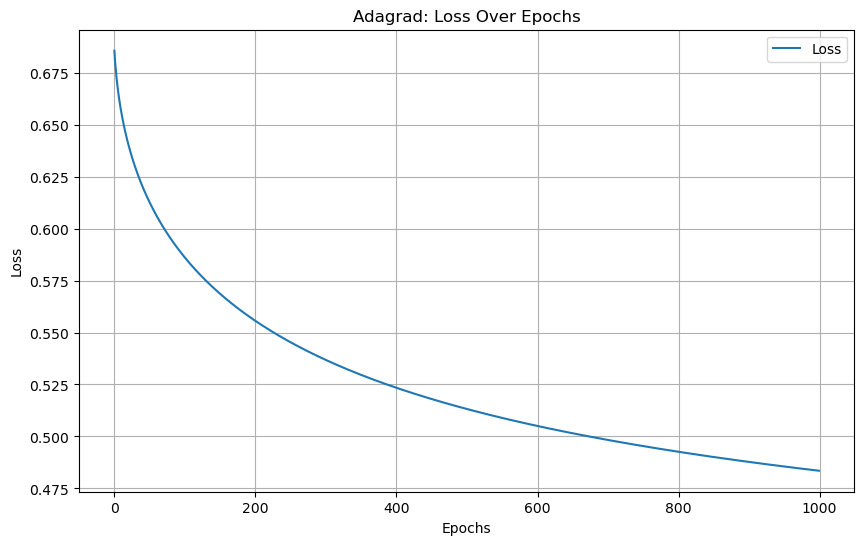

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Adagrad
class LogisticRegressionAdagrad:
    def __init__(self, learning_rate=0.01, epochs=1000, epsilon=1e-8):
        """
        Initialize the Logistic Regression model with Adagrad.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - epsilon: Small constant to prevent division by zero.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.epsilon = epsilon
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Adagrad optimization.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias, and cache for Adagrad
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        cache_w = np.zeros(X.shape[1])  # Cache for weights
        cache_b = 0  # Cache for bias
        
        # Gradient Descent with Adagrad loop
        for epoch in range(self.epochs):
            # Step 1: Calculate predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Step 2: Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias
            
            # Step 3: Update caches with squared gradients
            cache_w += dw**2
            cache_b += db**2
            
            # Step 4: Update weights and bias using the Adagrad rule
            self.weights -= (self.learning_rate / (np.sqrt(cache_w + self.epsilon))) * dw
            self.bias -= (self.learning_rate / (np.sqrt(cache_b + self.epsilon))) * db
            
            # Step 5: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Adagrad and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionAdagrad(learning_rate=0.01, epochs=1000, epsilon=1e-8)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Adagrad: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


# Adagrad with 3D Visualization

Epoch 0, Loss: 0.6252
Epoch 100, Loss: 0.4284
Epoch 200, Loss: 0.4252
Epoch 300, Loss: 0.4249
Epoch 400, Loss: 0.4249
Epoch 500, Loss: 0.4249
Epoch 600, Loss: 0.4249
Epoch 700, Loss: 0.4249
Epoch 800, Loss: 0.4249
Epoch 900, Loss: 0.4249


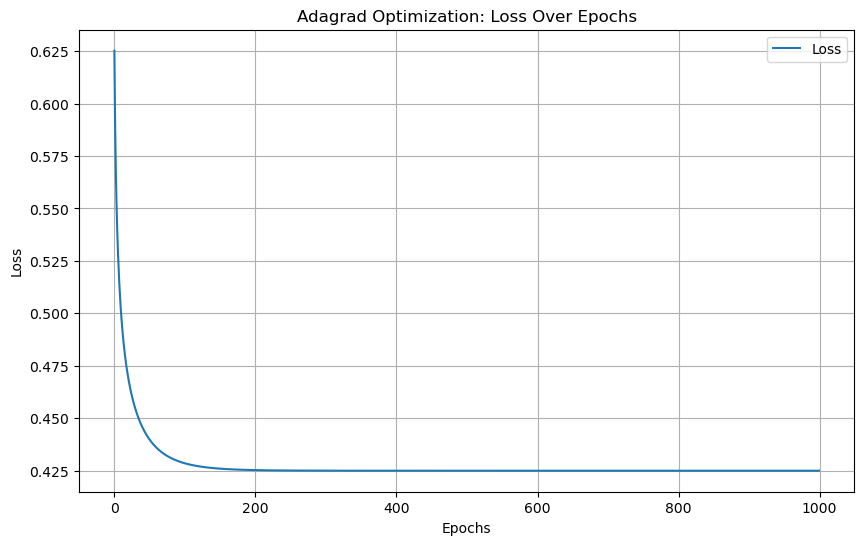

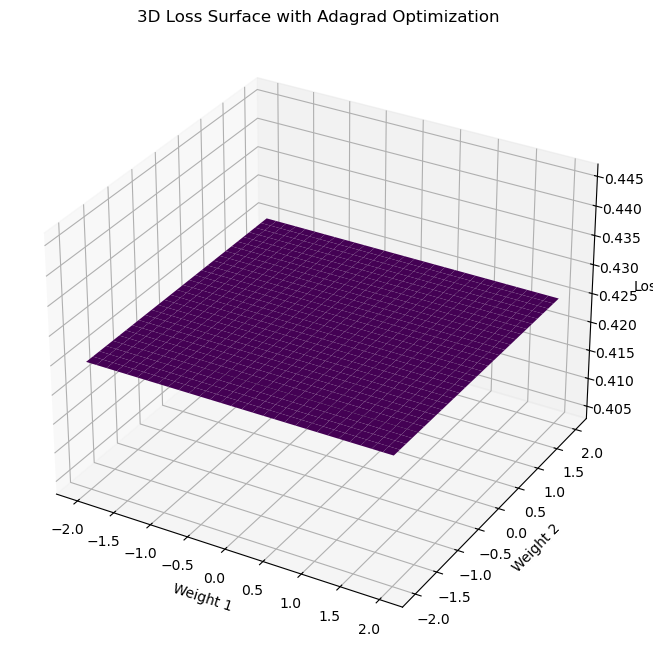

In [2]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Adagrad
class LogisticRegressionAdagrad:
    def __init__(self, learning_rate=0.01, epochs=1000, epsilon=1e-8):
        """
        Initialize the Logistic Regression model with Adagrad optimization.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - epsilon: A small value to prevent division by zero in Adagrad.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.epsilon = epsilon
        self.losses = []  # Store the loss over epochs for plotting

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Adagrad optimization.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias, and gradient accumulator for Adagrad
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        grad_squared = np.zeros(X.shape[1])  # Accumulated squared gradients for weights
        grad_squared_bias = 0  # Accumulated squared gradients for bias
        
        # Gradient Descent with Adagrad loop
        for epoch in range(self.epochs):
            # Step 1: Calculate predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Step 2: Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias
            
            # Step 3: Accumulate squared gradients for Adagrad
            grad_squared += dw**2
            grad_squared_bias += db**2
            
            # Step 4: Update weights and bias using Adagrad
            self.weights -= (self.learning_rate / (np.sqrt(grad_squared) + self.epsilon)) * dw
            self.bias -= (self.learning_rate / (np.sqrt(grad_squared_bias) + self.epsilon)) * db
            
            # Step 5: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and plot 3D visualization
def train_and_visualize():
    """
    Train the Logistic Regression model using Adagrad and visualize the optimization process.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionAdagrad(learning_rate=0.1, epochs=1000, epsilon=1e-8)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Adagrad Optimization: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # 3D plot of the loss surface (Weight1, Weight2, Loss)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    weight1_range = np.linspace(-2, 2, 30)
    weight2_range = np.linspace(-2, 2, 30)
    X_grid, Y_grid = np.meshgrid(weight1_range, weight2_range)
    
    # Compute the loss for each combination of weights
    Z_grid = np.array([[model.compute_loss(X_train, y_train) for x in weight1_range] for y in weight2_range])
    
    ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', edgecolor='none')
    ax.set_title("3D Loss Surface with Adagrad Optimization")
    ax.set_xlabel("Weight 1")
    ax.set_ylabel("Weight 2")
    ax.set_zlabel("Loss")
    plt.show()

# Run the training and visualization
train_and_visualize()


# RMS Prop

Optimized Point: [2.99498813 1.9949816 ]


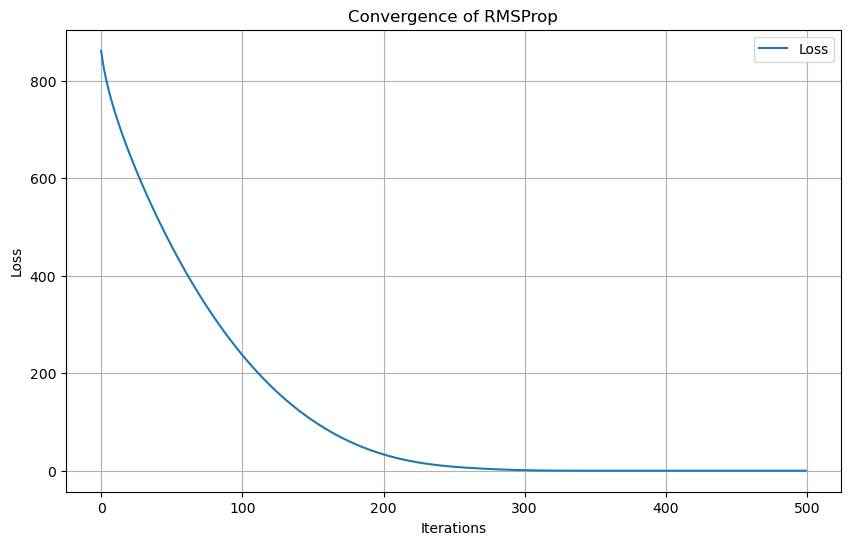

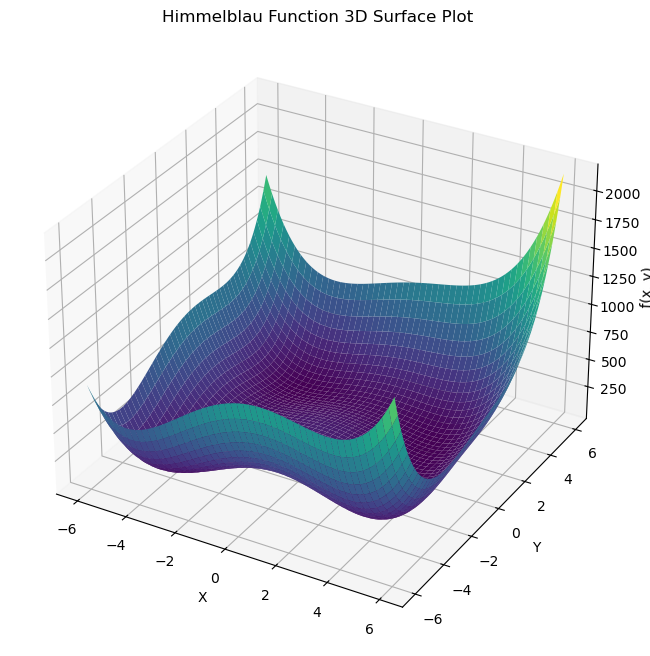

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Himmelblau function for visualization
def himmelblau(x, y):
    """
    Himmelblau's function: f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
    """
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Define the gradient of the Himmelblau function
def gradient(x, y):
    """
    Compute the gradient of Himmelblau's function with respect to x and y.
    """
    df_dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    df_dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([df_dx, df_dy])

# RMSProp function
def rmsprop(learning_rate, beta, epsilon, max_iters, start_point):
    """
    Perform RMSProp optimization.
    
    Parameters:
    - learning_rate: The learning rate (η).
    - beta: The decay factor (β).
    - epsilon: Small number to avoid division by zero.
    - max_iters: Maximum number of iterations.
    - start_point: The starting point (x, y).
    
    Returns:
    - The optimized point after max_iters iterations.
    - A list of losses for each iteration for visualization.
    """
    x, y = start_point
    v = np.zeros_like(start_point)  # Initialize the squared gradient average (velocity)
    losses = []
    
    for _ in range(max_iters):
        grad = gradient(x, y)
        
        # Update the squared gradients (v)
        v = beta * v + (1 - beta) * grad**2
        
        # Update the parameters (x, y)
        x -= learning_rate * grad[0] / (np.sqrt(v[0]) + epsilon)
        y -= learning_rate * grad[1] / (np.sqrt(v[1]) + epsilon)
        
        # Compute the loss (function value)
        loss = himmelblau(x, y)
        losses.append(loss)
    
    return np.array([x, y]), losses

# Step 2: Visualization and Plotting
def plot_loss_convergence(losses):
    """
    Plot the loss function value over iterations to visualize convergence.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label='Loss')
    plt.title('Convergence of RMSProp')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Generate 3D Surface Plot of the Himmelblau function
def plot_surface():
    """
    Generate a 3D surface plot of Himmelblau's function.
    """
    x = np.linspace(-6, 6, 400)
    y = np.linspace(-6, 6, 400)
    X, Y = np.meshgrid(x, y)
    Z = himmelblau(X, Y)
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Himmelblau Function 3D Surface Plot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(x, y)')
    plt.show()

# Step 4: Main Execution of RMSProp and Visualization
def main():
    # Define parameters for RMSProp
    learning_rate = 0.01
    beta = 0.9
    epsilon = 1e-8
    max_iters = 500
    start_point = np.array([5.0, 5.0])  # Starting point for optimization

    # Run RMSProp
    optimized_point, losses = rmsprop(learning_rate, beta, epsilon, max_iters, start_point)
    print(f"Optimized Point: {optimized_point}")
    
    # Plot the loss convergence graph
    plot_loss_convergence(losses)
    
    # Plot the surface of the Himmelblau function
    plot_surface()

# Execute the main function
main()


# Adams algorithm

Epoch 0, Loss: 0.6924
Epoch 100, Loss: 0.6269
Epoch 200, Loss: 0.5809
Epoch 300, Loss: 0.5475
Epoch 400, Loss: 0.5228
Epoch 500, Loss: 0.5039
Epoch 600, Loss: 0.4893
Epoch 700, Loss: 0.4777
Epoch 800, Loss: 0.4683
Epoch 900, Loss: 0.4605

Accuracy on test set: 0.7584


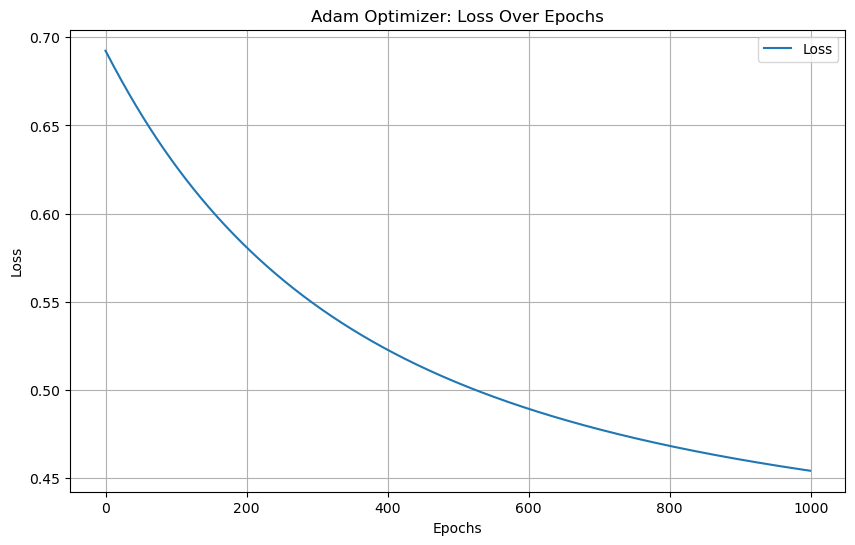

In [4]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Adam Optimizer
class LogisticRegressionAdam:
    def __init__(self, learning_rate=0.001, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
        """
        Initialize the Logistic Regression model with Adam optimizer parameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - beta1: The momentum parameter for the first moment estimate.
        - beta2: The momentum parameter for the second moment estimate.
        - epsilon: A small constant to prevent division by zero in the update step.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        # Add a small constant (1e-8) to avoid log(0)
        loss = log_loss(y, predictions)
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Adam optimizer.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights, bias, and moment estimates
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        m_w = np.zeros(X.shape[1])  # First moment (mean) for weights
        v_w = np.zeros(X.shape[1])  # Second moment (variance) for weights
        m_b = 0  # First moment for bias
        v_b = 0  # Second moment for bias
        
        # Adam optimization loop
        for epoch in range(self.epochs):
            # Step 1: Calculate predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)
            
            # Step 2: Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias
            
            # Step 3: Update first and second moment estimates
            m_w = self.beta1 * m_w + (1 - self.beta1) * dw
            v_w = self.beta2 * v_w + (1 - self.beta2) * (dw**2)
            m_b = self.beta1 * m_b + (1 - self.beta1) * db
            v_b = self.beta2 * v_b + (1 - self.beta2) * (db**2)
            
            # Bias correction
            m_w_hat = m_w / (1 - self.beta1**(epoch + 1))
            v_w_hat = v_w / (1 - self.beta2**(epoch + 1))
            m_b_hat = m_b / (1 - self.beta1**(epoch + 1))
            v_b_hat = v_b / (1 - self.beta2**(epoch + 1))
            
            # Step 4: Update weights and bias using the Adam rule
            self.weights -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
            self.bias -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)
            
            # Step 5: Calculate and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using Adam optimizer and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegressionAdam(learning_rate=0.001, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Adam Optimizer: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


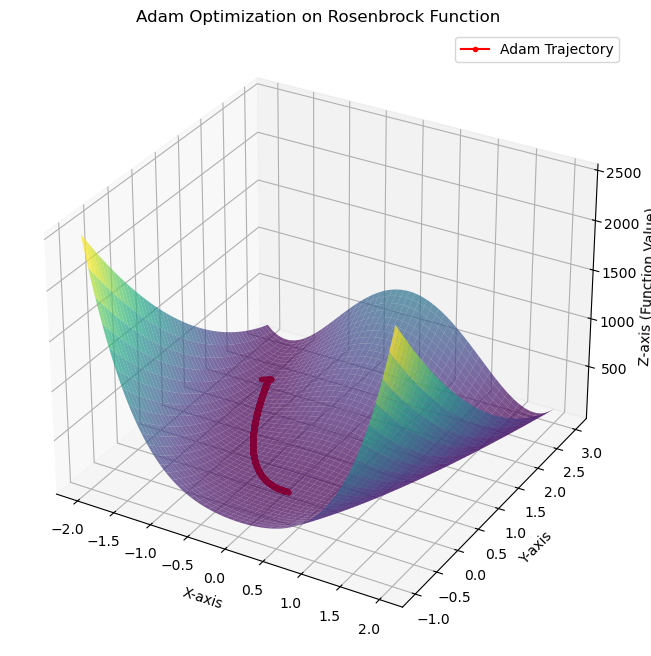

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rosenbrock function (for optimization)
def rosenbrock(x, y):
    """
    The Rosenbrock function is a common test problem for optimization algorithms.
    """
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradient of the Rosenbrock function
def rosenbrock_grad(x, y):
    """
    Gradient of the Rosenbrock function.
    """
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

# Adam optimization implementation
def adam_optimizer(grad_func, start_point, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000):
    """
    Adam optimizer implementation for a given function.
    grad_func: Gradient of the function to minimize.
    start_point: Initial point for optimization.
    """
    # Initialize variables
    x, y = start_point
    m = np.zeros(2)  # First moment (mean of gradients)
    v = np.zeros(2)  # Second moment (variance of gradients)
    t = 0  # Time step counter
    trajectory = [start_point]  # List to store points for plotting
    
    # Optimization loop
    for i in range(max_iter):
        t += 1
        grad = grad_func(x, y)  # Compute gradient at the current point
        
        m = beta1 * m + (1 - beta1) * grad  # Update first moment estimate
        v = beta2 * v + (1 - beta2) * grad**2  # Update second moment estimate
        
        # Bias correction
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        
        # Update parameters
        x -= learning_rate * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= learning_rate * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        
        trajectory.append([x, y])  # Store the current point
        
    return np.array(trajectory)

# Visualization of the Rosenbrock function
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Apply Adam optimizer
start_point = np.array([-1.5, 2])  # Starting point for optimization
trajectory = adam_optimizer(rosenbrock_grad, start_point, learning_rate=0.01, max_iter=1000)

# 3D Plot of the Rosenbrock function and the trajectory of Adam
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of the Rosenbrock function
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Plot the trajectory of Adam's optimization process
ax.plot(trajectory[:, 0], trajectory[:, 1], rosenbrock(trajectory[:, 0], trajectory[:, 1]), color='r', marker='o', markersize=3, label='Adam Trajectory')

# Labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis (Function Value)')
ax.set_title("Adam Optimization on Rosenbrock Function")
ax.legend()

# Show the plot
plt.show()


# Adagrad Implementation
Adagrad (Adaptive Gradient Algorithm)
Adagrad adjusts the learning rate based on the past gradient history for each parameter. It works well when dealing with sparse data.

Key Ideas:
Adagrad scales the learning rate for each parameter inversely proportional to the square root of the sum of past squared gradients.
This ensures that parameters with large gradients have smaller learning rates, and parameters with small gradients have larger learning rates.




In [6]:
import numpy as np

def adagrad_optimizer(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    v = np.zeros(n)  # Initialize squared gradients
    epsilon = 1e-8  # Small value to prevent division by zero
    
    # Gradient Descent with Adagrad
    for epoch in range(epochs):
        predictions = sigmoid(np.dot(X, theta))
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        
        # Update squared gradient
        v += gradient**2
        
        # Update parameters using Adagrad rule
        theta -= learning_rate * gradient / (np.sqrt(v) + epsilon)
        
        # Optionally print loss
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return theta

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# RMSprop (Root Mean Square Propagation)
RMSprop is similar to Adagrad but modifies the update rule by using a moving average of past squared gradients, which helps maintain a constant effective learning rate. This is especially useful in online and non-stationary problems.

Key Ideas:
RMSprop computes the running average of the square of the gradients and divides the gradient by this average.
It helps in preventing the learning rate from decaying too quickly (as in Adagrad).

In [7]:
def rmsprop_optimizer(X, y, learning_rate=0.01, epochs=1000, beta=0.9):
    m, n = X.shape
    theta = np.zeros(n)
    v = np.zeros(n)  # Initialize squared gradients
    epsilon = 1e-8  # Small value to prevent division by zero
    
    # Gradient Descent with RMSprop
    for epoch in range(epochs):
        predictions = sigmoid(np.dot(X, theta))
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        
        # Update squared gradient using moving average
        v = beta * v + (1 - beta) * gradient**2
        
        # Update parameters using RMSprop rule
        theta -= learning_rate * gradient / (np.sqrt(v) + epsilon)
        
        # Optionally print loss
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return theta


# Adam (Adaptive Moment Estimation)
Adam combines the ideas of momentum and RMSprop. It calculates both the moving averages of the gradient (like momentum) and the squared gradient (like RMSprop) to adjust the learning rates for each parameter.

Key Ideas:
Adam maintains two moving averages: one for the gradients (first moment) and one for the squared gradients (second moment).
It adapts the learning rate based on both the past gradients and their squared values.

In [8]:
def adam_optimizer(X, y, learning_rate=0.01, epochs=1000, beta1=0.9, beta2=0.999):
    m, n = X.shape
    theta = np.zeros(n)
    v = np.zeros(n)  # First moment estimate
    s = np.zeros(n)  # Second moment estimate
    epsilon = 1e-8  # Small value to prevent division by zero
    m_hat = np.zeros(n)  # Bias-corrected first moment
    s_hat = np.zeros(n)  # Bias-corrected second moment
    
    # Gradient Descent with Adam
    for epoch in range(epochs):
        predictions = sigmoid(np.dot(X, theta))
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        
        # Update the moving averages of the gradient and squared gradient
        v = beta1 * v + (1 - beta1) * gradient
        s = beta2 * s + (1 - beta2) * gradient**2
        
        # Bias correction
        m_hat = v / (1 - beta1**(epoch + 1))
        s_hat = s / (1 - beta2**(epoch + 1))
        
        # Update parameters using Adam rule
        theta -= learning_rate * m_hat / (np.sqrt(s_hat) + epsilon)
        
        # Optionally print loss
        if epoch % 100 == 0:
            loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return theta


Epoch 0, Loss: 0.6855
Epoch 100, Loss: 0.4505
Epoch 200, Loss: 0.4279
Epoch 300, Loss: 0.4252
Epoch 400, Loss: 0.4249
Epoch 500, Loss: 0.4249
Epoch 600, Loss: 0.4249
Epoch 700, Loss: 0.4249
Epoch 800, Loss: 0.4249
Epoch 900, Loss: 0.4249
Adam Accuracy on test set: 0.7472
Epoch 0, Loss: 0.6855
Epoch 100, Loss: 0.5860
Epoch 200, Loss: 0.5556
Epoch 300, Loss: 0.5368
Epoch 400, Loss: 0.5234
Epoch 500, Loss: 0.5132
Epoch 600, Loss: 0.5050
Epoch 700, Loss: 0.4983
Epoch 800, Loss: 0.4926
Epoch 900, Loss: 0.4878
Adagrad Accuracy on test set: 0.7528
Epoch 0, Loss: 0.6697
Epoch 100, Loss: 0.4360
Epoch 200, Loss: 0.4249
Epoch 300, Loss: 0.4249
Epoch 400, Loss: 0.4249
Epoch 500, Loss: 0.4249
Epoch 600, Loss: 0.4249
Epoch 700, Loss: 0.4249
Epoch 800, Loss: 0.4249
Epoch 900, Loss: 0.4249
Rmsprop Accuracy on test set: 0.7528


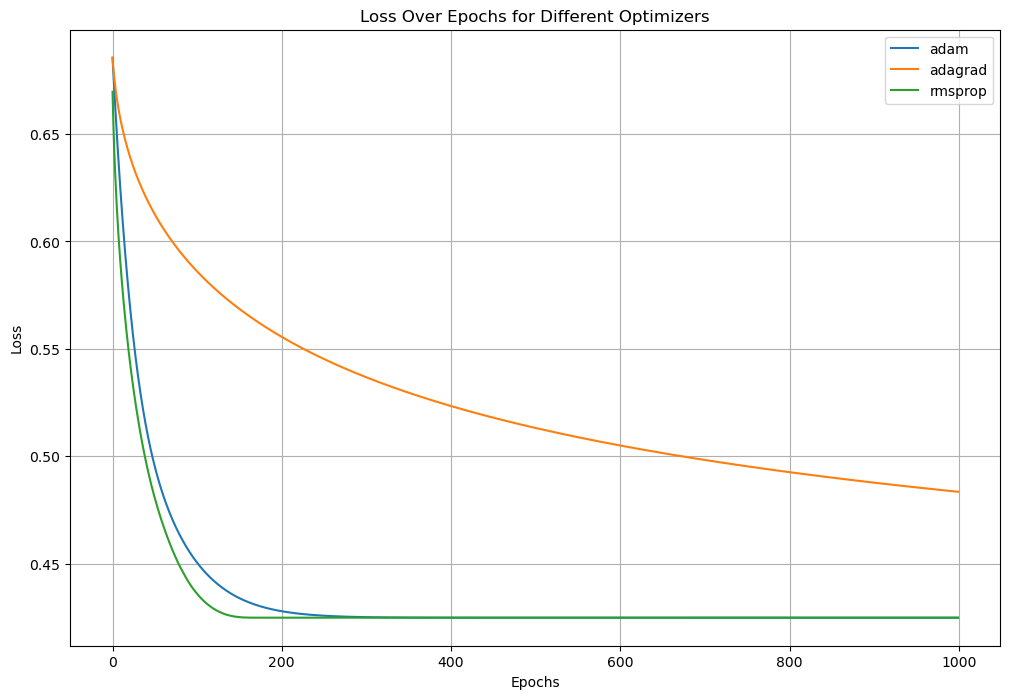

In [9]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    df = pd.read_csv('titanic.csv')
    df.drop(columns=['Name'], inplace=True)  # Drop the 'Name' column (not needed for prediction)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert 'Sex' to binary (0 or 1)
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize features for better optimization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Define the Logistic Regression with optimizers
class LogisticRegressionOptimizer:
    def __init__(self, learning_rate=0.01, epochs=1000, optimizer='adam'):
        """
        Initialize the Logistic Regression model with hyperparameters.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.optimizer = optimizer
        self.losses = []  # Store loss during training

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y):
        """
        Compute Binary Cross-Entropy Loss.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return log_loss(y, predictions)

    def fit(self, X, y):
        """
        Train the Logistic Regression model using a selected optimizer.
        """
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Initialize optimizer-specific variables
        if self.optimizer == 'adam':
            self.m_w = np.zeros(X.shape[1])
            self.v_w = np.zeros(X.shape[1])
            self.m_b = 0
            self.v_b = 0
            self.beta1 = 0.9
            self.beta2 = 0.999
            self.epsilon = 1e-8
        elif self.optimizer == 'adagrad':
            self.s_w = np.zeros(X.shape[1])  # Accumulated squared gradients
            self.s_b = 0
        elif self.optimizer == 'rmsprop':
            self.s_w = np.zeros(X.shape[1])  # Running average of squared gradients
            self.s_b = 0
            self.gamma = 0.9

        # Training loop
        for epoch in range(self.epochs):
            # Compute predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            # Compute gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            db = np.sum(error) / len(y)       # Gradient with respect to bias

            # Apply optimization method
            if self.optimizer == 'adam':
                # Adam update
                self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
                self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (dw**2)
                self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db
                self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (db**2)

                m_w_hat = self.m_w / (1 - self.beta1**(epoch + 1))
                v_w_hat = self.v_w / (1 - self.beta2**(epoch + 1))
                m_b_hat = self.m_b / (1 - self.beta1**(epoch + 1))
                v_b_hat = self.v_b / (1 - self.beta2**(epoch + 1))

                self.weights -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + self.epsilon)
                self.bias -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + self.epsilon)

            elif self.optimizer == 'adagrad':
                # Adagrad update
                self.s_w += dw**2
                self.s_b += db**2
                self.weights -= self.learning_rate * dw / (np.sqrt(self.s_w) + 1e-7)
                self.bias -= self.learning_rate * db / (np.sqrt(self.s_b) + 1e-7)

            elif self.optimizer == 'rmsprop':
                # RMSprop update
                self.s_w = self.gamma * self.s_w + (1 - self.gamma) * (dw**2)
                self.s_b = self.gamma * self.s_b + (1 - self.gamma) * (db**2)
                self.weights -= self.learning_rate * dw / (np.sqrt(self.s_w) + 1e-7)
                self.bias -= self.learning_rate * db / (np.sqrt(self.s_b) + 1e-7)

            # Compute and store the loss
            loss = self.compute_loss(X, y)
            self.losses.append(loss)

            # Print loss for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        """
        Make predictions using the trained model.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model with different optimizers and evaluate
def train_and_evaluate():
    """
    Train the model with Adam, Adagrad, and RMSProp optimizers and plot the loss over epochs.
    """
    X, y = load_and_preprocess_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    optimizers = ['adam', 'adagrad', 'rmsprop']
    plt.figure(figsize=(12, 8))

    for optimizer in optimizers:
        # Initialize and train the model with the selected optimizer
        model = LogisticRegressionOptimizer(learning_rate=0.01, epochs=1000, optimizer=optimizer)
        model.fit(X_train, y_train)

        # Plot the loss over epochs
        plt.plot(model.losses, label=optimizer)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{optimizer.capitalize()} Accuracy on test set: {accuracy:.4f}")

    # Customize plot
    plt.title("Loss Over Epochs for Different Optimizers")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


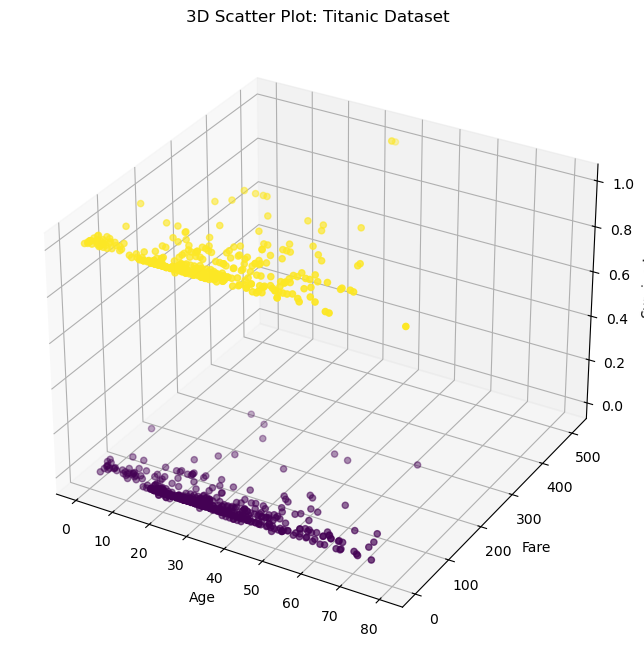

In [10]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and extract features for 3D visualization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (Age, Fare) and target (Survived)
    df = df.dropna(subset=['Age', 'Fare', 'Survived'])  # Drop rows with missing Age or Fare values
    X = df[['Age', 'Fare']].values  # Features
    y = df['Survived'].values      # Target: Survived (0 or 1)
    
    return X, y

# Step 2: Create 3D scatter plot for Titanic dataset
def plot_3d_titanic(X, y):
    """
    Create a 3D scatter plot for Age, Fare, and Survived.
    """
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot: Age (X-axis), Fare (Y-axis), Survived (Z-axis)
    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', marker='o')

    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    ax.set_zlabel('Survived')
    ax.set_title('3D Scatter Plot: Titanic Dataset')
    
    plt.show()

# Step 3: Load and plot the data
X, y = load_and_preprocess_data()
plot_3d_titanic(X, y)
